# Расчет (на основе результатов фазового анализа) дифференциальное сечение рассеяния в СЦИ сталкивающихся частиц в диапазоне энергий, заданных таблицей

Решение задачи сводится к решению следующего уравнения
$${dσ \over dΩ} = {1 \over k^2}|f|^2 + |g|^2 $$ 
где ***f*** - амплитуда рассеяния без переворота спина,
***g*** - амплитуда рассеяния с переворотом спина

Рассмотрим реакцию **K+p**

## Расчет интегрального сечения упругого рассеяния

In [2]:
# Задание библиотек, необходимых для расчетов
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integrate

In [3]:
# Ввод параметров рассеяния
m = np.loadtxt('/Users/marinapokidova/mepyth.py')
combo_list = m.flatten().tolist()
m[25]

array([ 2.500e+02,  0.000e+00,  0.000e+00, -2.587e-01,  7.210e-02,
        0.000e+00,  0.000e+00, -4.118e-01,  2.164e-01])

In [4]:
# Задание необходимых параметров 

m_p = 938.27
m_k = 493.66716

fl_2 = np.zeros(151, dtype=complex)
fl__2 = np.zeros(151, dtype=complex)
fl_21 = np.zeros(151, dtype=complex)
fl__21 = np.zeros(151, dtype=complex)

sumg1 = np.zeros((181, 151), dtype=complex)
sumf1 = np.zeros((181, 151), dtype=complex)
sumg0 = np.zeros((181, 151), dtype=complex)
sumf0 = np.zeros((181, 151), dtype=complex)

x = np.zeros(181)
Energy_ = [0] * 151

intdiff = [0] * 151
t = [0] * 181
ppK = [0] * 151
dif = np.zeros((181, 151))
dif_cs = [0] * 181
d = np.zeros((181, 151), dtype=float)

In [5]:
# цикл по энергиям (0,150) и по углам (0,180)

vvod = input("E, meV:")
Energy = int(vvod)

for E in range(0, 1501, 10):
    ppK[E // 10] = 0.001 * 0.001 * pow(m_p, 2) * E * (E + 2 * m_k) / (pow((m_k + m_p), 2) + 2 * m_p * E)  # pi++p
    Energy_[E // 10] = E 
    for i in range(0, 181):
        teta = math.radians(i)
        x[i] = teta
        p = [1, math.cos(teta),
             (3. * math.cos(teta) * math.cos(teta) - 1.) / 2.,
             (5. * math.cos(teta) * math.cos(teta) * math.cos(teta) - 3. * math.cos(teta)) / 2.,
             (35. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) - 30. * math.cos(teta) * math.cos(teta) + 3.) / 8.,
             (63. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) - 70. * math.cos(teta) * math.cos(teta) * math.cos(teta) + 15. * math.cos(teta)) / 8.,
             (231. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) - 315. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) + 105. * math.cos(teta) * math.cos(teta) - 5.) / 16.,
             (429. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) - 693. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) + 315. * math.cos(teta) * math.cos(teta) * math.cos(teta) - 35. * math.cos(teta)) / 16.]

        pr = [0.,
              1.,
              3 * math.cos(teta),
              (15. * math.cos(teta) * math.cos(teta) - 3) / 2.,
              (35. * 4. * math.cos(teta) * math.cos(teta) * math.cos(teta) - 60. * math.cos(teta)) / 8.,
              (63. * 5. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) - 70. * 3. * math.cos(teta) * math.cos(teta) + 15.) / 8.,
              (231. * 6. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) - 315. * 4. * math.cos(teta) * math.cos(teta) * math.cos(teta) + 105. * 2. * math.cos(teta)) / 16.,
              (429. * 7. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) - 693. * 5. * math.cos(teta) * math.cos(teta) * math.cos(teta) * math.cos(teta) + 315. * 3. * math.cos(teta) * math.cos(teta) - 35.) / 16.]

        for L in range(0, 8):
            fl_2[E // 10] = complex(combo_list[(E // 10) * 9 + 1 + 1359 * L], combo_list[(E // 10) * 9 + 2 + 1359 * L])
            fl__2[E // 10] = complex(combo_list[(E // 10) * 9 + 3 + 1359 * L], combo_list[(E // 10) * 9 + 4 + 1359 * L])
            sumf0[i][E // 10] = sumf0[i][E // 10] + (fl_2[E // 10] * L + (L + 1) * fl__2[E // 10]) * p[L]
            sumg0[i][E // 10] = sumg0[i][E // 10] + (-fl_2[E // 10] + fl__2[E // 10]) * math.sin(teta) * pr[L]

            fl_21[E // 10] = complex(combo_list[(E // 10) * 9 + 5 + 1359 * L], combo_list[(E // 10) * 9 + 6 + 1359 * L])
            fl__21[E // 10] = complex(combo_list[(E // 10) * 9 + 7 + 1359 * L], combo_list[(E // 10) * 9 + 8 + 1359 * L])
            sumf1[i][E // 10] = sumf1[i][E // 10] + (fl_21[E // 10] * L + (L + 1) * fl__21[E // 10]) * p[L]
            sumg1[i][E // 10] = sumg1[i][E // 10] + (-fl_21[E // 10] + fl__21[E // 10]) * math.sin(teta) * pr[L]
            if ppK[E // 10] != 0:
                dif[i][E // 10] = 0.389 * (pow(abs(sumf1[i][E // 10]), 2) + pow(abs(sumg1[i][E // 10]), 2)) / (ppK[E // 10])  # pi++p
        d[i][E // 10] = (dif[i][E // 10])*2 * 3.14 * math.sin(teta) 

        dif_cs[i] = dif[i][Energy // 10]
        t[i] = d[i][E // 10]
        
        
        intdiff[E // 10] += (dif[i][E // 10])*2 * 3.14 * math.sin(teta) * 0.0175


E, meV:50


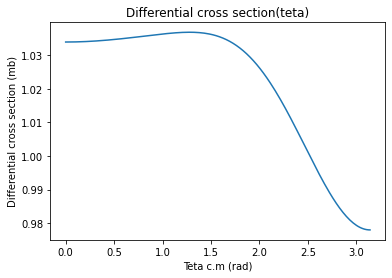

In [6]:
#График зависимости дифференциального сечения от угла (в радианах)
plt.title("Differential cross section(teta)")
plt.xlabel("Teta c.m (rad)")
plt.ylabel("Differential cross section (mb)")
plt.plot(x,dif_cs)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

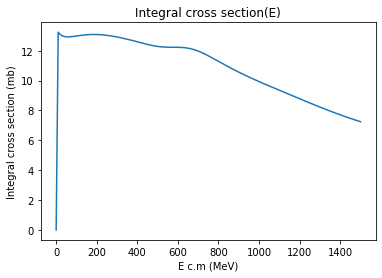

In [7]:
#График зависимости интегрального сечения от энергии (в МэВ)
plt.title("Integral cross section(E)")
plt.xlabel("E c.m (MeV)")
plt.ylabel("Integral cross section (mb)")
plt.plot(Energy_, intdiff)
plt.plot